In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [35]:
ls

movies.csv                   ratings.csv.zip
ratings.csv                  recommendation-system.ipynb


In [36]:
movies_df = pd.read_csv('movies.csv')
rating_df = pd.read_csv('ratings.csv')

In [37]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [38]:
rating_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


#### Dataset information

In [39]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [40]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### EDA

In [41]:
merged_df = pd.merge(rating_df, movies_df, on='movieId')


In [44]:
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [42]:
merged_df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

#### Rating Statistics

In [45]:
merged_df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

#### Movies Rating

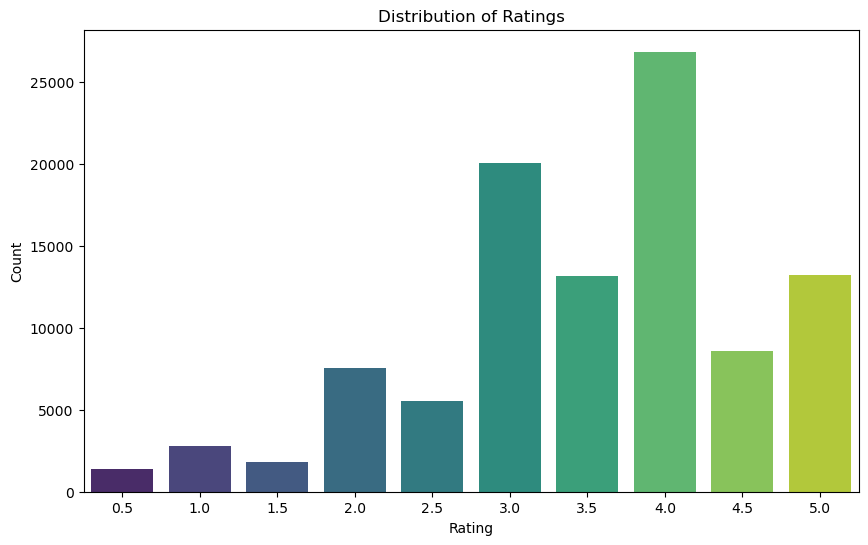

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=merged_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Number of rating per movie

In [46]:
ratings_per_movie = merged_df.groupby('title')['rating'].count().sort_values(ascending=False)

In [47]:
ratings_per_movie

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

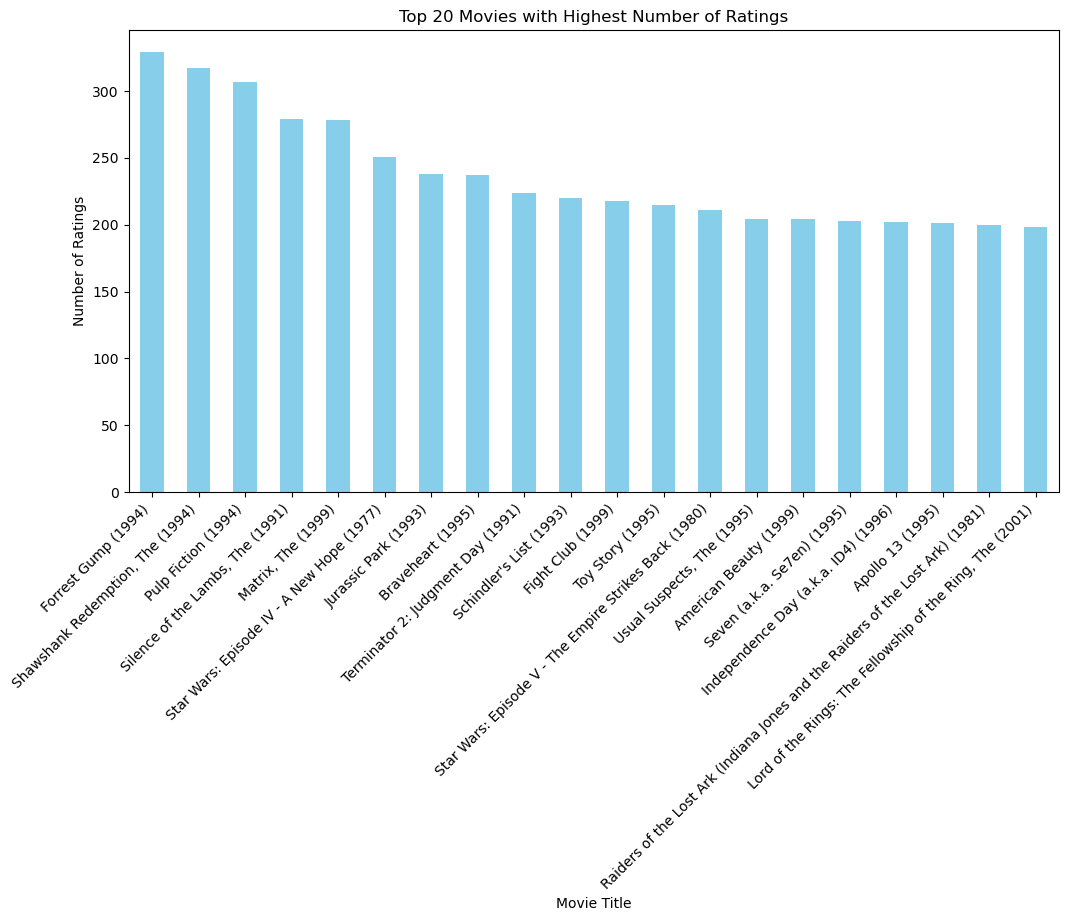

In [48]:
plt.figure(figsize=(12, 6))
ratings_per_movie[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Movies with Highest Number of Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Top 20 Movies with Highest Average Ratings

In [49]:
average_rating_per_movie = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)


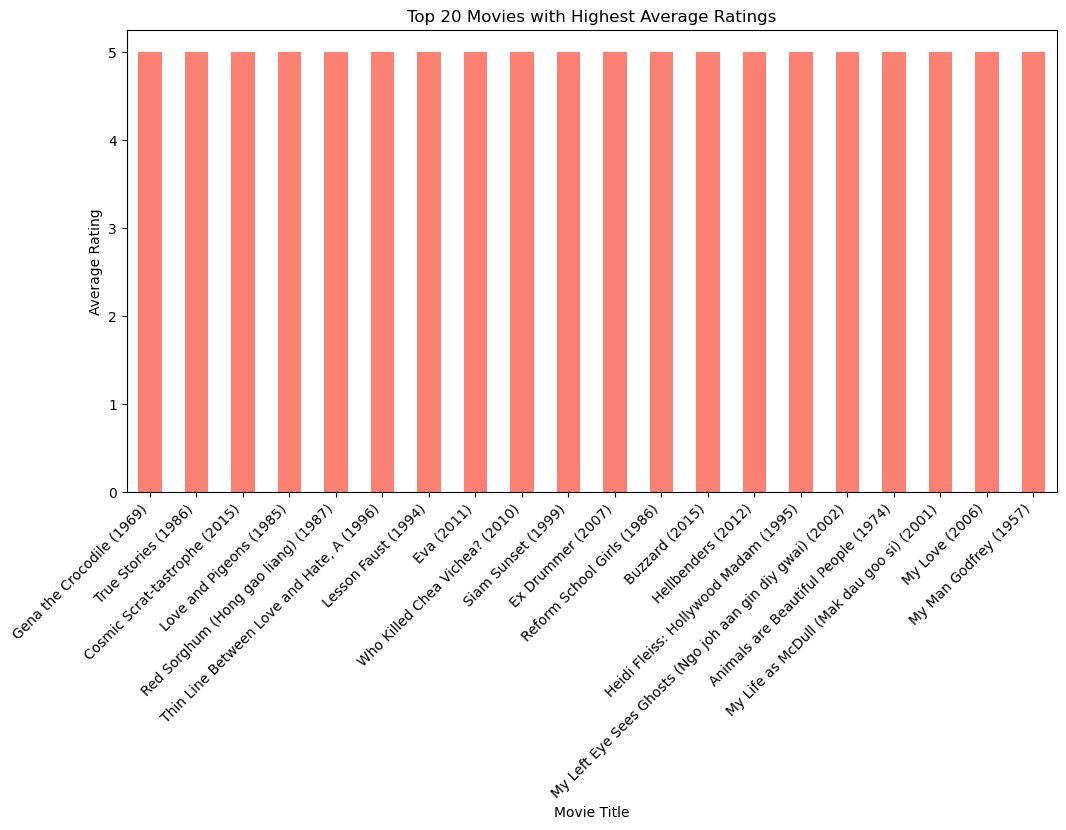

In [52]:
plt.figure(figsize=(12, 6))
average_rating_per_movie[:20].plot(kind='bar', color='salmon')
plt.title('Top 20 Movies with Highest Average Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Genres distribution

In [53]:
genres_list = '|'.join(movies_df['genres']).split('|')
genres_count = pd.Series(genres_list).value_counts()

In [56]:
genres_count

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64

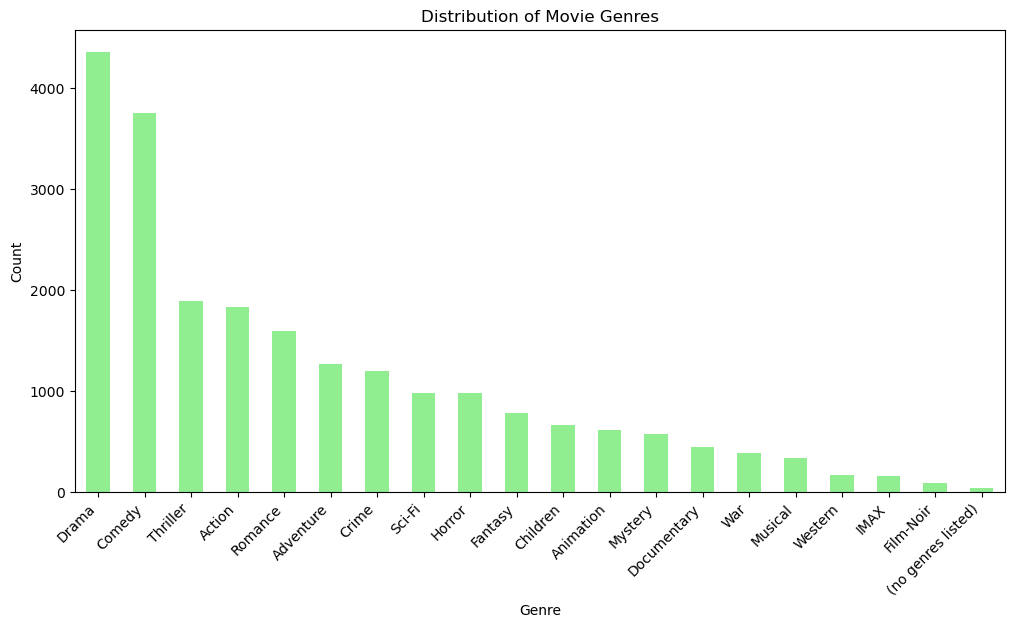

In [57]:
plt.figure(figsize=(12, 6))
genres_count.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [60]:
def split_data_by_user(df, test_size=0.5, random_state=42):
    train_data, test_data = pd.DataFrame(columns=df.columns), pd.DataFrame(columns=df.columns)
    
    unique_users = df['userId'].unique()
    
    for user_id in unique_users:
        user_data = df[df['userId'] == user_id]
        train_user, test_user = train_test_split(user_data, test_size=test_size, random_state=random_state)
        
        train_data = pd.concat([train_data, train_user])
        test_data = pd.concat([test_data, test_user])
    
    return train_data, test_data

In [61]:
train_data, test_data = split_data_by_user(merged_df, test_size=0.5, random_state=42)


In [62]:
train_data

,userId,movieId,rating,timestamp,title,genres
15411,1,3439,4.0,964981799,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy
13849,1,2858,5.0,964980868,American Beauty (1999),Drama|Romance
4121,1,592,4.0,964982271,Batman (1989),Action|Crime|Thriller
1212,1,216,5.0,964981208,Billy Madison (1995),Comedy
16028,1,3740,4.0,964982417,Big Trouble in Little China (1986),Action|Adventure|Comedy|Fantasy
...,...,...,...,...,...,...
56310,578,76251,4.5,1300996806,Kick-Ass (2010),Action|Comedy
78762,578,81562,5.0,1300996352,127 Hours (2010),Adventure|Drama|Thriller
85435,578,58154,4.5,1300996719,"Other Boleyn Girl, The (2008)",Drama|Romance
94654,578,71823,4.5,1300996741,"New York, I Love You (2009)",Drama|Romance


In [63]:
test_data

,userId,movieId,rating,timestamp,title,genres
15656,1,3578,5.0,964980668,Gladiator (2000),Action|Adventure|Drama
6579,1,1127,4.0,964982513,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller
1135,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War
12997,1,2617,2.0,964982588,"Mummy, The (1999)",Action|Adventure|Comedy|Fantasy|Horror|Thriller
1568,1,260,5.0,964981680,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
...,...,...,...,...,...,...
99953,578,7395,4.0,1300996571,Cheaper by the Dozen (1950),Comedy|Drama
39624,578,45668,5.0,1300996257,"Lake House, The (2006)",Drama|Fantasy|Romance
42739,578,73017,5.0,1300996791,Sherlock Holmes (2009),Action|Crime|Mystery|Thriller
42879,578,81845,5.0,1300996688,"King's Speech, The (2010)",Drama


In [64]:
train_data[train_data['userId'] == 1]

,userId,movieId,rating,timestamp,title,genres
15411,1,3439,4.0,964981799,Teenage Mutant Ninja Turtles II: The Secret of...,Action|Children|Fantasy
13849,1,2858,5.0,964980868,American Beauty (1999),Drama|Romance
4121,1,592,4.0,964982271,Batman (1989),Action|Crime|Thriller
1212,1,216,5.0,964981208,Billy Madison (1995),Comedy
16028,1,3740,4.0,964982417,Big Trouble in Little China (1986),Action|Adventure|Comedy|Fantasy
...,...,...,...,...,...,...
10076,1,1644,3.0,964983536,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller
1498,1,235,4.0,964980908,Ed Wood (1994),Comedy|Drama
9245,1,1377,3.0,964982653,Batman Returns (1992),Action|Crime
13497,1,2700,5.0,964980985,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy|Musical


In [65]:
test_data[test_data['userId'] == 1]

,userId,movieId,rating,timestamp,title,genres
15656,1,3578,5.0,964980668,Gladiator (2000),Action|Adventure|Drama
6579,1,1127,4.0,964982513,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller
1135,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War
12997,1,2617,2.0,964982588,"Mummy, The (1999)",Action|Adventure|Comedy|Fantasy|Horror|Thriller
1568,1,260,5.0,964981680,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
...,...,...,...,...,...,...
9457,1,1517,5.0,964981107,Austin Powers: International Man of Mystery (1...,Action|Adventure|Comedy
4649,1,608,5.0,964982931,Fargo (1996),Comedy|Crime|Drama|Thriller
13732,1,2797,4.0,964981710,Big (1988),Comedy|Drama|Fantasy|Romance
6127,1,1080,5.0,964981327,Monty Python's Life of Brian (1979),Comedy
